In [1]:
import matplotlib.pyplot as plt
from CNNModel import CNNModel
from NNModel import NNModel
from Citra import Citra
import cv2 as cv
import os
import numpy as np

Using TensorFlow backend.


In [3]:
# cap = cv.VideoCapture('http://192.168.13.7:8080/video')
cap = cv.VideoCapture('data/data mentah/baru/video/2.3gp')
model = NNModel('hasil learning/model NN 94.0625.h5', 'categorical_crossentropy', 'sgd')
model.outputClass = ['mentah', 'setah', 'setang', 'matang']
    
while(True):
    ret, frame = cap.read()
    
    if ret == False:
        cap.set(2, 0)
        continue

    citra = Citra(frame)
    citra.resize((768, 384))
    citra.toGray()
    citra.toBinaryInv(150, 255)
    cc = citra.getContour(800, 50000)
    cc.classify = True
    cc.classifier = model
    cc.croppedResize = (128, 128)
    cc.findContour()
    cv.imshow('Hasil', cc.labeled)
    cv.imshow('Binary', citra.processed)
    if cv.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv.destroyAllWindows()

In [2]:
plt.figure(figsize=(13,13))

mlp = Mlp('hasil learning/v2/model CNN 99.0625.h5', 'categorical_crossentropy', 'sgd')
mlp.outputClass = ['mentah', 'set mang', 'ham tang', 'matang']

citra = Citra(cv.imread('data/data mentah/baru/IMG_20181208_174220.jpg'))
citra.resize((1024, 768))
citra.toGray()
citra.toBinaryInv(150, 255)
cc = citra.getContour(6000, 500000)
cc.classify = True
cc.classifier = mlp
cc.croppedResize = (128, 128)
cc.findContour()
plt.imshow(cv.cvtColor(cc.labeled, cv.COLOR_BGR2RGB))
# plt.imshow(citra.processed, cmap='gray')
plt.show()

NameError: name 'Mlp' is not defined

<Figure size 936x936 with 0 Axes>

In [3]:
def getTrainingData(path, label):
    trainImages = []

    for file in os.listdir(path):
        if file.endswith('.png') == False:
            continue
            
        filePath = os.path.join(path, file)
        img = cv.imread(filePath)
        img = cv.resize(img, (128, 128))
        trainImages.append([img, label])
        
    return np.array(trainImages)

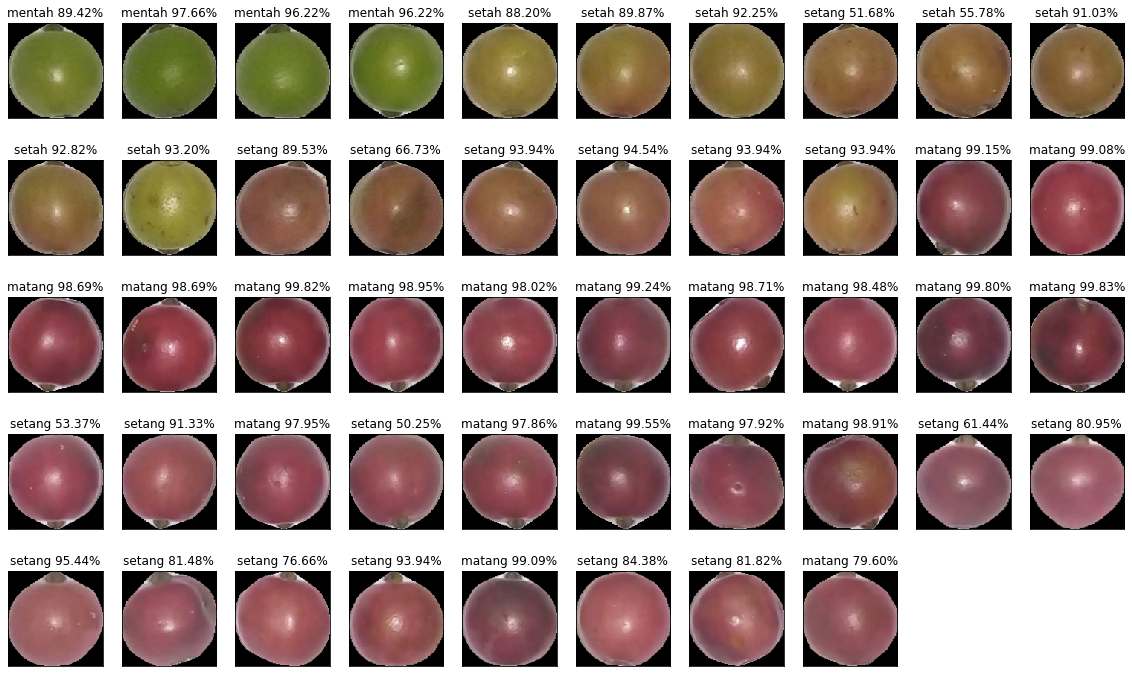

In [4]:
k1 = np.array([i[0] for i in getTrainingData('data/Dataset/v2/1', None)[80:]])
k2 = np.array([i[0] for i in getTrainingData('data/Dataset/v2/2', None)[80:]])
k3 = np.array([i[0] for i in getTrainingData('data/Dataset/v2/3', None)[80:]])
k4 = np.array([i[0] for i in getTrainingData('data/Dataset/v2/4', None)[80:]])

test_data = np.concatenate((k1, k2, k3, k4), axis = 0)
fig = plt.figure(figsize = (20, 50))
model = NNModel('hasil learning/Model NN 94.0625.h5', 'categorical_crossentropy', 'sgd')
model.outputClass = ['mentah', 'setah', 'setang', 'matang']

for counter, item in enumerate(test_data):
    y = fig.add_subplot(20, 10, counter + 1)
    output = model.predict(test_data[counter])
    
    y.imshow(cv.cvtColor(test_data[counter], cv.COLOR_BGR2RGB))
    plt.title(output)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)